# Resizing DBM Dataset Images

### Mounting drive to upload files from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Importing the required libraries for the code

In [ ]:
import os
import numpy as np
import xml.etree
from numpy import zeros, asarray

### Uploading DBM dataset file (with images and XML files) and visualize & utils Python files

In [ ]:
!pip install mrcnn
import mrcnn

!unzip "//gdrive//My Drive//DBM Mask RCNN//Updated New Data resized images only proper images.zip"
!cp "/gdrive/My Drive/DBM Mask RCNN/utils.py" "utils.py"
!cp "/gdrive/My Drive/DBM Mask RCNN/visualize.py" "visualize.py"
import utils
import visualize

     |████████████████████████████████| 51 kB 349 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54931 sha256=178dea073ea5dc5bc9bf4cacb72d529ef17b988b4e14a5fec6f2c28c554b1d5b
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn
Archive:  //gdrive//My Drive//DBM Mask RCNN//Updated New Data resized images only proper images.zip
   creating: Updated New Data resized images only proper images/annots/
  inflating: Updated New Data resized images only proper images/annots/1.xml  
  inflating: Updated New Data resized images only proper images/annots/102.xml  
  inflating: Updated New Data resized images only proper images/annots/103.xml  
  inflating: Updated New Data resized images only proper images/annots/104.xml  
  inflating: Updated New Data resized images only proper images/annots/105.xml  
  inflating: Updated New Data resized images only proper images/annots/106.xml  
  inflatin

### DBM Dataset

In [ ]:
class DBMDataset(utils.Dataset):

  def load_dataset(self, dataset_dir):
    self.add_class("dataset", 1, "DBM")
    
    images_dir = dataset_dir + '//images//'
    annotations_dir = dataset_dir + '//annots//'
    
    for filename in os.listdir(images_dir):
      image_id = filename.split('.')[0]

      img_path = images_dir + filename
      ann_path = annotations_dir + image_id + '.xml'
      
      self.add_image('dataset', image_id = image_id, path = img_path, annotation = ann_path)

  def extract_boxes(self, filename):
    tree = xml.etree.ElementTree.parse(filename)
    root = tree.getroot()
    
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
    
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    #print(info)
    path = info['annotation']
    #print(path)
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype = 'uint8')

    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('DBM'))
    return masks, asarray(class_ids, dtype = 'int32')

### Prepare the dataset with all the images

In [ ]:
dataset = DBMDataset()
dataset.load_dataset(dataset_dir = 'Updated New Data resized images only proper images')
dataset.prepare()

### Importing libraries needed for the code below

In [ ]:
from pathlib import Path
#import xml.etree.cElementTree as ET
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt

### Create a labelImg compatible XML file using the bounding boxes coordinates

In [ ]:
x_length = []
y_length = []
both_length = []
area = []

### Resize the images and save the generated images and XML files

In [ ]:
for image_id in dataset.image_ids:
  image = dataset.load_image(image_id)

  print("image_id:", image_id)
  mask, class_ids = dataset.load_mask(int(image_id))

  image, window, scale, padding, _ = utils.resize_image(image, 
                                                        min_dim=1024, 
                                                        max_dim=1024, 
                                                        mode="none")

  mask = utils.resize_mask(mask, scale, padding)
  bbox = utils.extract_bboxes(mask)

  for box in bbox:
    xmin, ymin, xmax, ymax = box[1], box[0], box[3], box[2]

    x_diff = xmax - xmin
    y_diff = ymax - ymin

    if x_diff != 0:
      x_length.append(x_diff)
      both_length.append(x_diff)
    if y_diff != 0:
      y_length.append(y_diff)
      both_length.append(y_diff)
    if x_diff != 0 and y_diff != 0:
      area.append(x_diff*y_diff)

image_id: 0
image_id: 1
image_id: 2
image_id: 3
image_id: 4
image_id: 5
image_id: 6
image_id: 7
image_id: 8
image_id: 9
image_id: 10
image_id: 11
image_id: 12
image_id: 13
image_id: 14
image_id: 15
image_id: 16
image_id: 17
image_id: 18
image_id: 19
image_id: 20
image_id: 21
image_id: 22
image_id: 23
image_id: 24
image_id: 25
image_id: 26
image_id: 27
image_id: 28
image_id: 29
image_id: 30
image_id: 31
image_id: 32
image_id: 33
image_id: 34
image_id: 35
image_id: 36
image_id: 37
image_id: 38
image_id: 39
image_id: 40
image_id: 41
image_id: 42
image_id: 43
image_id: 44
image_id: 45
image_id: 46
image_id: 47
image_id: 48
image_id: 49
image_id: 50
image_id: 51
image_id: 52
image_id: 53
image_id: 54
image_id: 55
image_id: 56
image_id: 57
image_id: 58
image_id: 59
image_id: 60
image_id: 61
image_id: 62
image_id: 63
image_id: 64
image_id: 65
image_id: 66
image_id: 67
image_id: 68
image_id: 69
image_id: 70
image_id: 71
image_id: 72
image_id: 73
image_id: 74
image_id: 75
image_id: 76
image_id:

### Getting statistics about the length of bounding boxes

In [ ]:
print("X length:", x_length)
print("Y length:", y_length)
print("Both length:", both_length)
print("Area:", area)

X length: [29, 17, 22, 32, 32, 29, 35, 32, 31, 25, 20, 28, 34, 38, 34, 35, 24, 28, 30, 27, 39, 29, 24, 22, 48, 36, 24, 21, 35, 28, 35, 16, 35, 32, 19, 16, 21, 27, 23, 23, 26, 23, 31, 26, 21, 34, 15, 31, 33, 37, 31, 23, 27, 20, 33, 25, 29, 24, 33, 42, 31, 34, 16, 19, 22, 30, 19, 32, 34, 21, 31, 23, 30, 35, 28, 26, 20, 29, 33, 29, 29, 28, 28, 25, 32, 22, 36, 28, 13, 23, 25, 19, 26, 30, 22, 34, 55, 32, 35, 31, 29, 16, 32, 32, 26, 30, 32, 41, 18, 26, 42, 25, 24, 24, 14, 23, 18, 27, 25, 24, 27, 19, 28, 24, 18, 38, 24, 21, 13, 25, 24, 25, 33, 21, 31, 30, 31, 38, 18, 32, 23, 36, 23, 36, 34, 29, 29, 27, 37, 22, 30, 31, 22, 22, 33, 24, 28, 25, 24, 15, 26, 22, 34, 18, 26, 25, 19, 10, 22, 27, 22, 30, 28, 14, 17, 29, 31, 28, 39, 40, 39, 21, 20, 27, 29, 26, 24, 15, 27, 43, 33, 20, 34, 21, 26, 19, 20, 31, 31, 18, 19, 26, 29, 36, 26, 19, 25, 34, 26, 38, 26, 29, 32, 22, 31, 17, 24, 30, 24, 14, 34, 24, 32, 27, 21, 28, 32, 31, 35, 27, 30, 31, 37, 39, 27, 27, 28, 37, 20, 31, 29, 39, 23, 31, 33, 35, 37, 3

In [ ]:
import statistics

In [ ]:
print("X length:", x_length)
print("mean x_length: ", np.mean(x_length))
print("Biggest x_length: ", max(x_length))
print("Smallest x_length: ", min(x_length))
print("Median x_length: ", statistics.median(x_length))
print("Std Dev x_length: ", np.std(x_length))

print("\nY length:", y_length)
print("mean y_length: ", np.mean(y_length))
print("Biggest y_length: ", max(y_length))
print("Smallest y_length: ", min(y_length))
print("Median y_length: ", statistics.median(y_length))
print("Std Dev y_length: ", np.std(y_length))

print("\nBoth length:", both_length)
print("mean both_length: ", np.mean(both_length))
print("Biggest both_length: ", max(both_length))
print("Smallest both_length: ", min(both_length))
print("Median both_length: ", statistics.median(both_length))
print("Std Dev both_length: ", np.std(both_length))

print("\nArea:", area)
print("mean area: ", np.mean(area))
print("Biggest area: ", max(area))
print("Smallest area: ", min(area))
print("Median area: ", statistics.median(area))
print("Std Dev area: ", np.std(area))

X length: [29, 17, 22, 32, 32, 29, 35, 32, 31, 25, 20, 28, 34, 38, 34, 35, 24, 28, 30, 27, 39, 29, 24, 22, 48, 36, 24, 21, 35, 28, 35, 16, 35, 32, 19, 16, 21, 27, 23, 23, 26, 23, 31, 26, 21, 34, 15, 31, 33, 37, 31, 23, 27, 20, 33, 25, 29, 24, 33, 42, 31, 34, 16, 19, 22, 30, 19, 32, 34, 21, 31, 23, 30, 35, 28, 26, 20, 29, 33, 29, 29, 28, 28, 25, 32, 22, 36, 28, 13, 23, 25, 19, 26, 30, 22, 34, 55, 32, 35, 31, 29, 16, 32, 32, 26, 30, 32, 41, 18, 26, 42, 25, 24, 24, 14, 23, 18, 27, 25, 24, 27, 19, 28, 24, 18, 38, 24, 21, 13, 25, 24, 25, 33, 21, 31, 30, 31, 38, 18, 32, 23, 36, 23, 36, 34, 29, 29, 27, 37, 22, 30, 31, 22, 22, 33, 24, 28, 25, 24, 15, 26, 22, 34, 18, 26, 25, 19, 10, 22, 27, 22, 30, 28, 14, 17, 29, 31, 28, 39, 40, 39, 21, 20, 27, 29, 26, 24, 15, 27, 43, 33, 20, 34, 21, 26, 19, 20, 31, 31, 18, 19, 26, 29, 36, 26, 19, 25, 34, 26, 38, 26, 29, 32, 22, 31, 17, 24, 30, 24, 14, 34, 24, 32, 27, 21, 28, 32, 31, 35, 27, 30, 31, 37, 39, 27, 27, 28, 37, 20, 31, 29, 39, 23, 31, 33, 35, 37, 3

### Plotting the deviation of the lengths

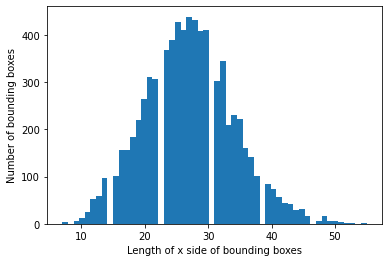

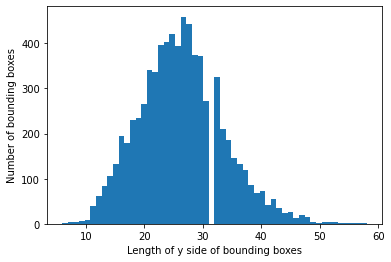

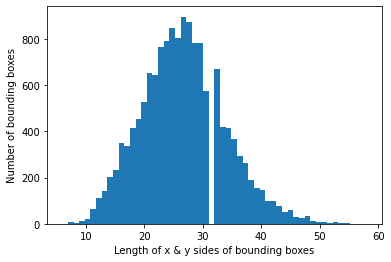

In [ ]:
plt.hist(x_length, bins=54)
plt.xlabel("Length of x side of bounding boxes")
plt.ylabel("Number of bounding boxes")
plt.show()

plt.hist(y_length, bins=54)
plt.xlabel("Length of y side of bounding boxes")
plt.ylabel("Number of bounding boxes")
plt.show()

plt.hist(both_length, bins=54)
plt.xlabel("Length of x & y sides of bounding boxes")
plt.ylabel("Number of bounding boxes")
plt.show()

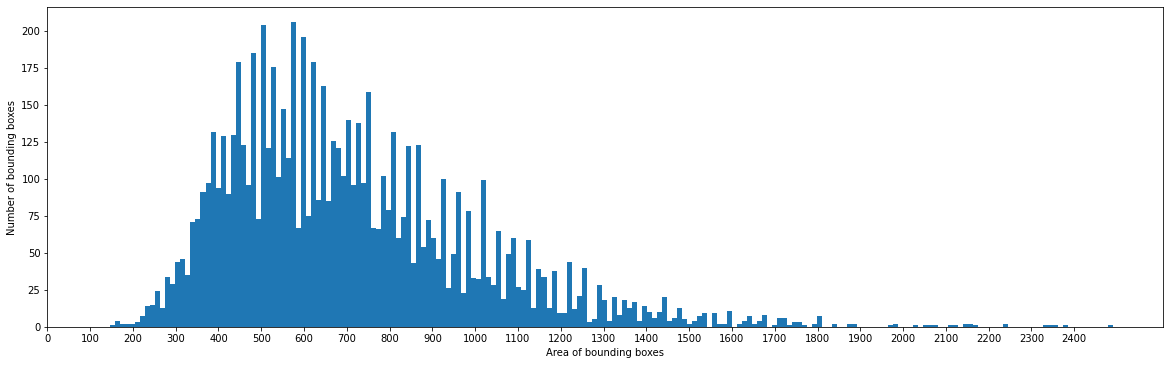

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 1, 1)
plt.hist(area, bins=200)
plt.xticks(np.arange(0, max(area), 100))
plt.xlabel("Area of bounding boxes")
plt.ylabel("Number of bounding boxes")
plt.show()

In [ ]:
area_copy = area.copy()
area_copy.sort()
print(area_copy)

[147, 161, 161, 168, 168, 175, 175, 189, 192, 198, 198, 208, 208, 210, 220, 220, 220, 220, 228, 228, 228, 230, 230, 230, 231, 231, 234, 234, 234, 234, 240, 240, 240, 240, 240, 242, 243, 243, 243, 247, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 256, 256, 260, 260, 260, 261, 261, 261, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 266, 266, 266, 270, 270, 270, 273, 275, 275, 275, 275, 275, 275, 276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 279, 280, 280, 280, 280, 280, 280, 285, 285, 286, 286, 286, 286, 286, 286, 286, 286, 286, 286, 286, 286, 288, 288, 288, 288, 288, 288, 290, 290, 290, 290, 290, 294, 294, 294, 294, 294, 294, 297, 297, 297, 297, 299, 299, 299, 299, 299, 299, 299, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 304, 304, 304, 304, 304, 304, 306, 306, 306, 306, 306, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 310, 310, 312, 312, 312, 312, 312, 312,

In [ ]:
for image_id in dataset.image_ids:
  image = dataset.load_image(image_id)
  info = dataset.image_info[image_id]

  #print("image_id:", image_id)
  mask, class_ids = dataset.load_mask(int(image_id))

  image, window, scale, padding, _ = utils.resize_image(image, 
                                                        min_dim=1024, 
                                                        max_dim=1024, 
                                                        mode="none")

  mask = utils.resize_mask(mask, scale, padding)
  bbox = utils.extract_bboxes(mask)

  for box in bbox:
    xmin, ymin, xmax, ymax = box[1], box[0], box[3], box[2]

    x_diff = xmax - xmin
    y_diff = ymax - ymin

    if x_diff*y_diff < 250:
      print("Image:", info["id"])
      print("Area:", x_diff*y_diff)

Image: 513
Area: 228
Image: 513
Area: 198
Image: 513
Area: 220
Image: 513
Area: 230
Image: 493
Area: 192
Image: 493
Area: 231
Image: 493
Area: 228
Image: 493
Area: 240
Image: 493
Area: 234
Image: 493
Area: 168
Image: 493
Area: 175
Image: 493
Area: 210
Image: 493
Area: 220
Image: 493
Area: 161
Image: 493
Area: 147
Image: 493
Area: 168
Image: 493
Area: 247
Image: 344
Area: 240
Image: 300
Area: 175
Image: 300
Area: 240
Image: 223
Area: 228
Image: 217
Area: 198
Image: 290
Area: 234
Image: 372
Area: 234
Image: 478
Area: 161
Image: 478
Area: 231
Image: 478
Area: 242
Image: 478
Area: 243
Image: 478
Area: 230
Image: 478
Area: 240
Image: 478
Area: 243
Image: 478
Area: 234
Image: 478
Area: 240
Image: 478
Area: 220
Image: 478
Area: 189
Image: 478
Area: 208
Image: 478
Area: 220
Image: 478
Area: 243
Image: 478
Area: 208
Image: 478
Area: 230
